In [1]:
## this makes figure 3 of the LVDB overview paper 
## Aitoff projection of the MW dwarf galaxies
## Aitoff projection of the M31, LF/LG and Local Volume dwarf galaxies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table
from astropy.io import ascii

from astropy import units as u
import astropy.coordinates as coord

import yaml

In [3]:
## this package will automatically adjust text to not overlap (for example, with dwarf galaxy abbreviations )
from adjustText import adjust_text

In [4]:
## good looking plots?
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [5]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

In [6]:
## loads lasted versions from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
gc_ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')
gc_disk = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_disk.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')
gc_dwarf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_dwarf_hosted.csv')

In [7]:
coord.galactocentric_frame_defaults.set('v4.0')
gc_frame = coord.Galactocentric()

In [8]:
## add abbreviations for MW dwarf galaxies
dsph_mw['abv'] = np.zeros(len(dsph_mw), dtype='U100')
# path = '/Users/apace/Documents/local_volume_database/data_input/'
path = '../data_input/'
for i in range(len(dsph_mw)):
    with open(path+ dsph_mw['key'][i] +'.yaml', 'r') as stream:
            try:
                stream_yaml = yaml.load(stream, Loader=yaml.Loader)

                if 'abbreviation' in stream_yaml['name_discovery'].keys():
                    dsph_mw['abv'][i] = stream_yaml['name_discovery']['abbreviation']

            except yaml.YAMLError as exc:
                print(exc)


In [9]:
## skycoord for MW dwarf galaxy
c_dsph_mw = coord.SkyCoord(ra=dsph_mw['ra']*u.deg, dec=dsph_mw['dec']*u.deg,  frame='icrs', distance=dsph_mw['distance']*u.kpc, radial_velocity=dsph_mw['vlos_systemic']*u.km/u.s, pm_ra_cosdec=dsph_mw['pmra']*u.mas/u.yr,pm_dec=dsph_mw['pmdec']*u.mas/u.yr)

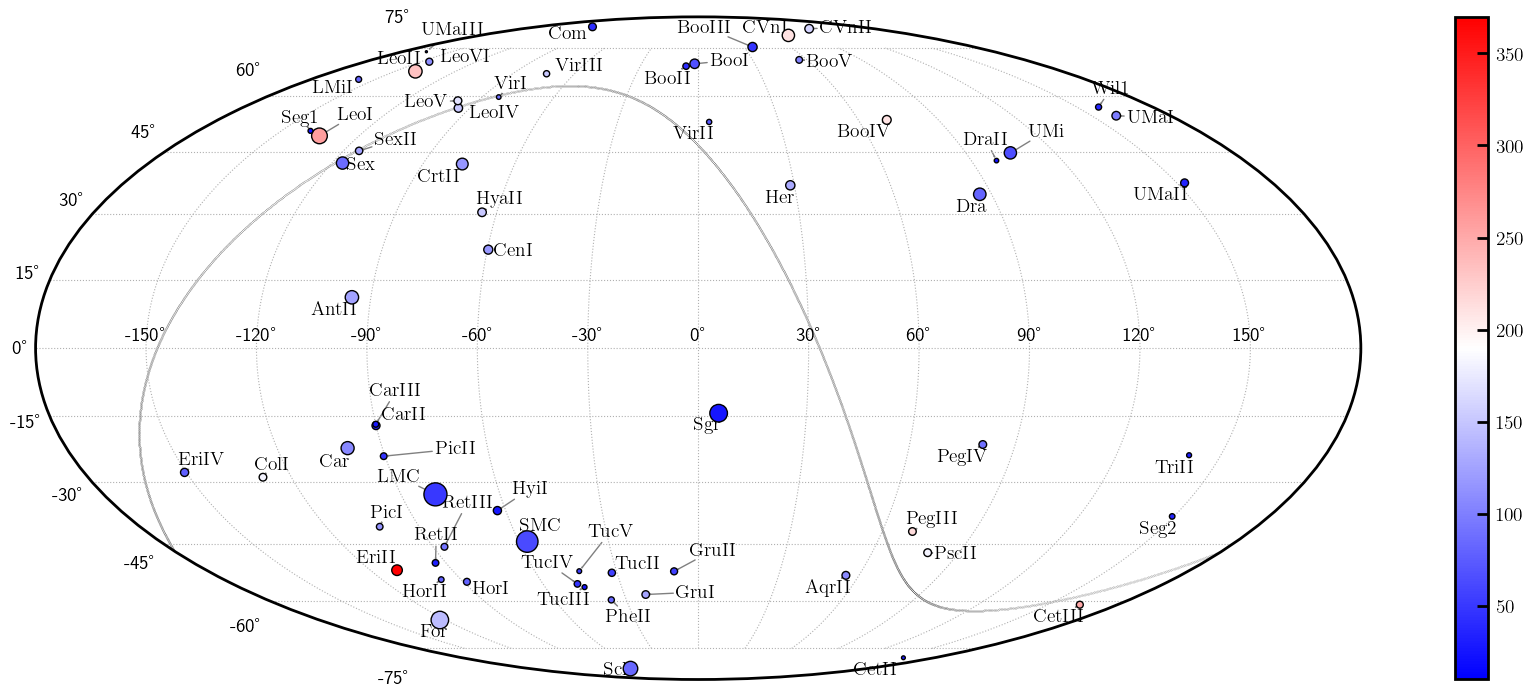

In [10]:
## final version of MW dwarf galaxies
fig = plt.figure(1,figsize=(16*1.2,6*1.2))
ax = fig.add_subplot(111, projection='mollweide')
cb = ax.scatter(c_dsph_mw.galactic.l.wrap_at(180*u.deg).rad, c_dsph_mw.galactic.b.rad  , c=c_dsph_mw.distance.value, label=r'${\rm Dwarf~MW}$', cmap='bwr', s=dsph_mw['mass_stellar']**2.5, zorder=10, ec='k')
plt.colorbar(cb)
## colorbar is based on distance
## size of points is based on stellar mass (mass-to-light ratio =2)

## this labels the objects
texts = [plt.text(c_dsph_mw.galactic.l.wrap_at(180*u.deg).rad[i], c_dsph_mw.galactic.b.rad[i], r'${\rm '+dsph_mw['abv'][i]+'}$', ha='center', va='center') for i in range(len(c_dsph_mw))]

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))


## this adds ra, dec=0 grey line
gal_long = np.arange(-180., 180., .1)
c_gc = coord.SkyCoord(ra=gal_long*u.deg, dec=np.zeros(len(gal_long))*u.deg,  frame='icrs')
temp = c_gc.transform_to('galactic')
ax.plot(temp.galactic.l.wrap_at(180*u.deg).rad, temp.galactic.b.rad  , '.', c='k', ms=.1, rasterized=True,zorder=1)

ax.grid(ls=':')

plt.tight_layout()
plt.savefig('plots/aitoff_MW_v3.pdf', transparent=True)
plt.show()

In [11]:
c_dsph_m31 = coord.SkyCoord(ra=dsph_m31['ra']*u.deg, dec=dsph_m31['dec']*u.deg,  frame='icrs', distance=dsph_m31['distance']*u.kpc)
c_dsph_lf = coord.SkyCoord(ra=dsph_lf['ra']*u.deg, dec=dsph_lf['dec']*u.deg,  frame='icrs', distance=dsph_lf['distance']*u.kpc)

In [12]:
lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')
c_lf_distant = coord.SkyCoord(ra=lf_distant['ra']*u.deg, dec=lf_distant['dec']*u.deg,  frame='icrs', distance=lf_distant['distance']*u.kpc)

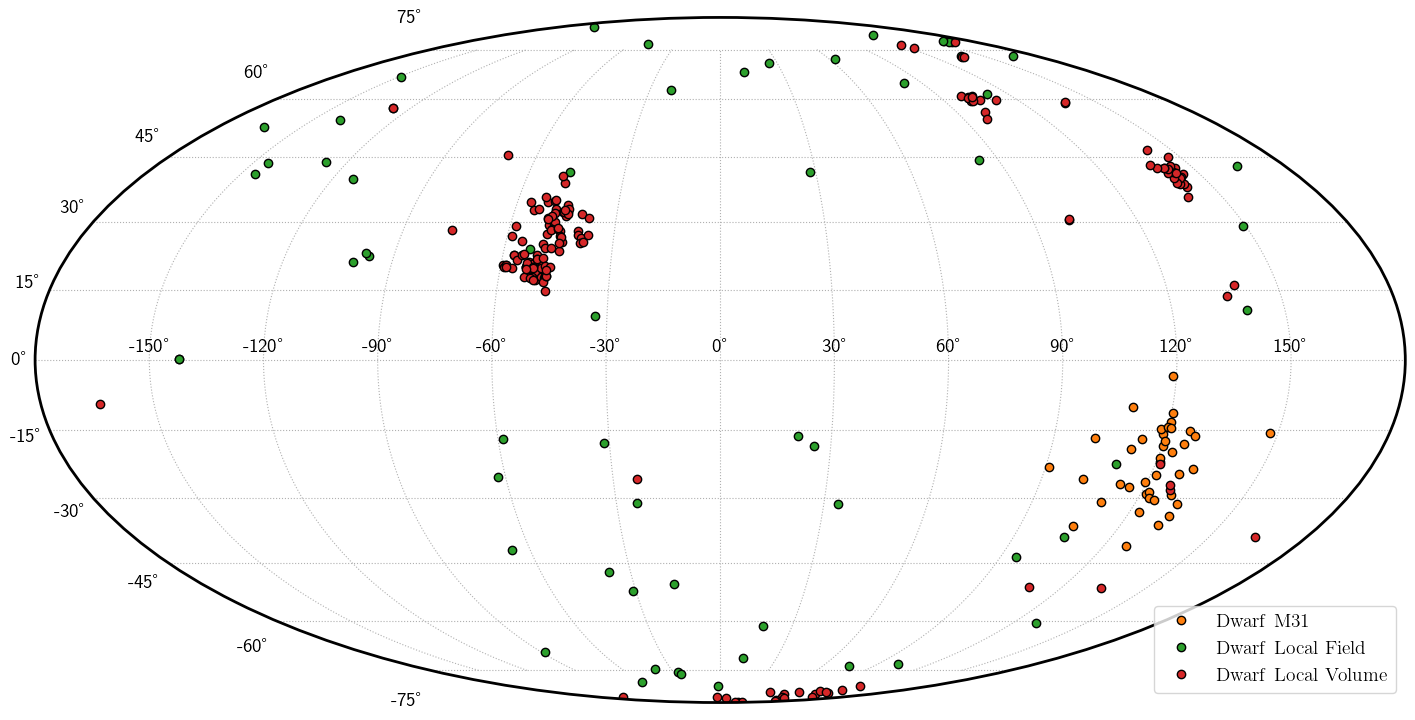

In [13]:
## middle panel of figure 3
## this is M31, Local Group (D < 3 Mpc, not MW/M31), and Local Volume (D > 3 Mpc)
## note that Local Volume is incomplete
fig = plt.figure(1,figsize=(16*.9,9*.9))
ax = fig.add_subplot(111, projection='mollweide')

ax.plot(c_dsph_m31.galactic.l.wrap_at(180*u.deg).rad, c_dsph_m31.galactic.b.rad  , 'o', label=r'${\rm Dwarf~M31}$', mec='k', c=color_dsph_m31)
ax.plot(c_dsph_lf.galactic.l.wrap_at(180*u.deg).rad, c_dsph_lf.galactic.b.rad  , 'o', label=r'${\rm Dwarf~Local~Field}$', mec='k',c=color_dsph_lf)
ax.plot(c_lf_distant.galactic.l.wrap_at(180*u.deg).rad, c_lf_distant.galactic.b.rad  , 'o', label=r'${\rm Dwarf~Local~Volume}$', mec='k',c=color_dsph_lf_distant)

ax.grid(ls=':')
ax.legend(loc=4)
plt.tight_layout()
plt.savefig('plots/aitoff_dwarf_LF.pdf',transparent=True)
plt.show()

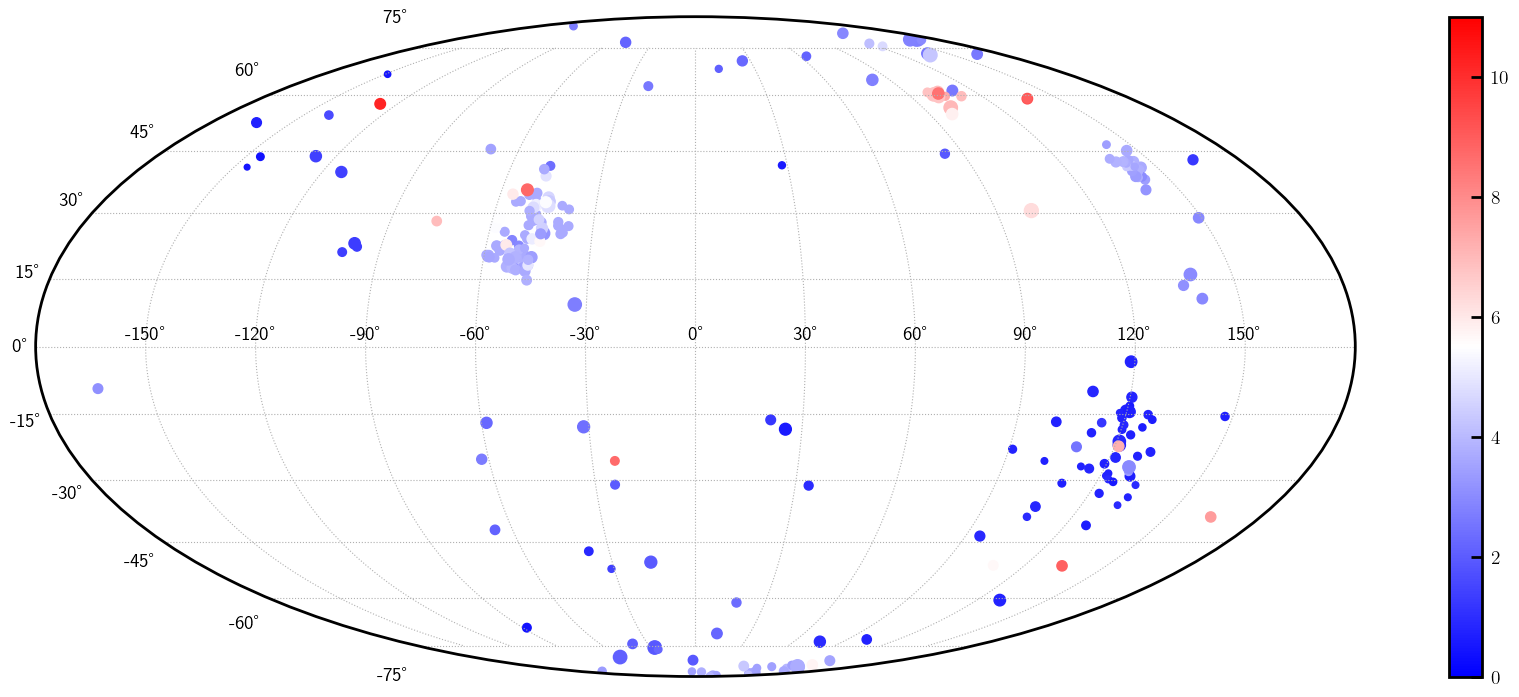

In [14]:
## version of plot similar to the MW plot with distance colorbar and point size based on stellar mass
## note the distance is in Mpc
fig = plt.figure(1,figsize=(16*1.2,6*1.2))
ax = fig.add_subplot(111, projection='mollweide')


ax.scatter(c_dsph_m31.galactic.l.wrap_at(180*u.deg).rad, c_dsph_m31.galactic.b.rad  , label=r'${\rm Dwarf~M31}$', c=dsph_m31['distance']/1000., cmap='bwr', vmin=0., vmax=11, s=dsph_m31['mass_stellar']**2)
ax.scatter(c_dsph_lf.galactic.l.wrap_at(180*u.deg).rad, c_dsph_lf.galactic.b.rad , label=r'${\rm Dwarf~LF}$', c=dsph_lf['distance']/1000., cmap='bwr', vmin=0., vmax=11, s=dsph_lf['mass_stellar']**2)
cb = ax.scatter(c_lf_distant.galactic.l.wrap_at(180*u.deg).rad, c_lf_distant.galactic.b.rad  ,  label=r'${\rm Dwarf~LF~Distant}$', c=lf_distant['distance']/1000., cmap='bwr', vmin=0., vmax=11, s=lf_distant['mass_stellar']**2)
plt.colorbar(cb)

ax.grid(ls=':')

plt.tight_layout()

plt.show()

In [15]:
## select MW GCs
gc_harris2= gc_harris[gc_harris['host']=='mw']
c_gc_harris2 = coord.SkyCoord(ra=gc_harris2['ra']*u.deg, dec=gc_harris2['dec']*u.deg,  frame='icrs', distance=gc_harris2['distance']*u.kpc)

In [16]:
## select saggittarius GCs
keep = np.zeros(len(gc_harris), dtype=bool)
for i in range(len(gc_harris)):
    if gc_harris['host'][i] in ['sagittarius_1']:
        keep[i]=True
    else:
        keep[i]=False
gc_dwarf_sgr = gc_harris[keep]
c_gc_dwarf_sgr = coord.SkyCoord(ra=gc_dwarf_sgr['ra']*u.deg, dec=gc_dwarf_sgr['dec']*u.deg,  frame='icrs', distance=gc_dwarf_sgr['distance']*u.kpc)


In [17]:
ufsc_bright = gc_ufsc[gc_ufsc['M_V']<-5]
ufsc_other= gc_ufsc[gc_ufsc['M_V']>-5]
print(len(ufsc_bright), len(ufsc_other), len(gc_ufsc))
## this separation is to put Sgr 2 and Cra 1 with the other GCs 

c_ufsc = coord.SkyCoord(ra=ufsc_other['ra']*u.deg, dec=ufsc_other['dec']*u.deg,  frame='icrs', distance=ufsc_other['distance']*u.kpc)
c_ufsc_b = coord.SkyCoord(ra=ufsc_bright['ra']*u.deg, dec=ufsc_bright['dec']*u.deg,  frame='icrs',distance=ufsc_bright['distance']*u.kpc)

c_gc_disk = coord.SkyCoord(ra=gc_disk['ra']*u.deg, dec=gc_disk['dec']*u.deg,  frame='icrs', distance=gc_disk['distance']*u.kpc)

2 27 29


In [18]:
## selection LMC/SMC clusters
keep = np.zeros(len(gc_dwarf), dtype=bool)
for i in range(len(gc_dwarf)):
    if gc_dwarf['host'][i] in ['lmc', 'smc']:
        keep[i]=True
    else:
        keep[i]=False
lmc_smc = gc_dwarf[keep]
c_lmc_smc = coord.SkyCoord(ra=lmc_smc['ra']*u.deg, dec=lmc_smc['dec']*u.deg,  frame='icrs', distance=lmc_smc['distance']*u.kpc)

keep = np.zeros(len(gc_dwarf), dtype=bool)
for i in range(len(gc_dwarf)):
    if gc_dwarf['host'][i] not in ['lmc', 'smc'] and gc_dwarf['distance'][i] <400:
        keep[i]=True
    else:
        keep[i]=False
gc_dwarf_mw = gc_dwarf[keep]
c_gc_dwarf_mw = coord.SkyCoord(ra=gc_dwarf_mw['ra']*u.deg, dec=gc_dwarf_mw['dec']*u.deg,  frame='icrs', distance=gc_dwarf_mw['distance']*u.kpc)
len(gc_dwarf_mw), len(lmc_smc)

(8, 48)

In [19]:
c_ufsc_all = coord.SkyCoord(ra=gc_ufsc['ra']*u.deg, dec=gc_ufsc['dec']*u.deg,  frame='icrs', distance=gc_ufsc['distance']*u.kpc)

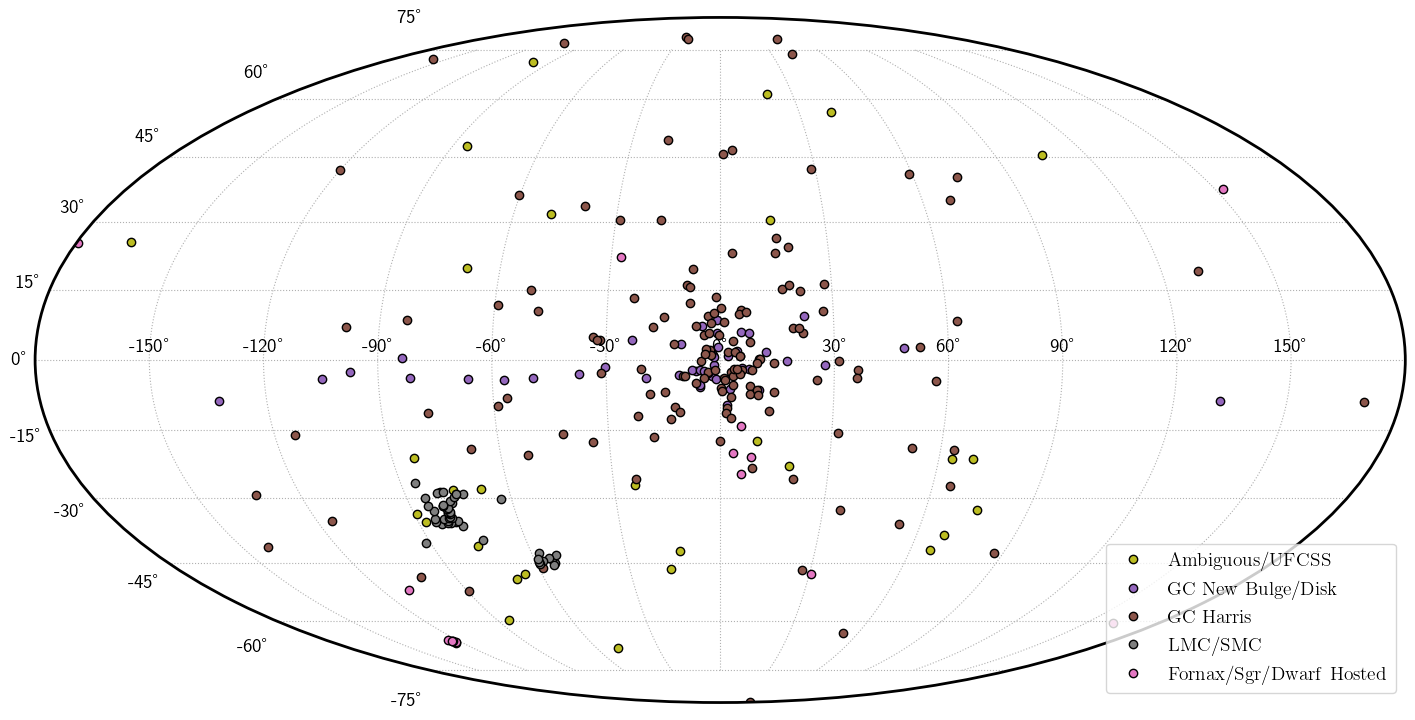

In [20]:
fig = plt.figure(1,figsize=(16*.9,9*.9))
ax = fig.add_subplot(111, projection='mollweide')

ax.plot(c_ufsc.galactic.l.wrap_at(180*u.deg).rad, c_ufsc.galactic.b.rad  , 'o', label=r'${\rm Ambiguous/UFCSS}$', c=color_gc_ufcss, mec='k')
ax.plot(c_gc_disk.galactic.l.wrap_at(180*u.deg).rad, c_gc_disk.galactic.b.rad  , 'o', label=r'${\rm GC~New~Bulge/Disk}$', c=color_gc_disk, mec='k')
ax.plot(c_ufsc_b.galactic.l.wrap_at(180*u.deg).rad, c_ufsc_b.galactic.b.rad  , 'o',  c=color_gc_ufcss, mec='k')
ax.plot(c_gc_harris2.galactic.l.wrap_at(180*u.deg).rad, c_gc_harris2.galactic.b.rad  , 'o', label=r'${\rm GC~Harris}$', c=color_gc_harris, mec='k')
ax.plot(c_lmc_smc.galactic.l.wrap_at(180*u.deg).rad, c_lmc_smc.galactic.b.rad  , 'o', label=r'${\rm LMC/SMC}$', c=color_gc_lmc_smc, mec='k')
ax.plot(c_gc_dwarf_sgr.galactic.l.wrap_at(180*u.deg).rad, c_gc_dwarf_sgr.galactic.b.rad  , 'o', label=r'${\rm Fornax/Sgr/Dwarf~Hosted}$', c=color_gc_dwarf, mec='k')
ax.plot(c_gc_dwarf_mw.galactic.l.wrap_at(180*u.deg).rad, c_gc_dwarf_mw.galactic.b.rad  , 'o', c=color_gc_dwarf, mec='k')
ax.grid(ls=':')
ax.legend(loc=4)
plt.tight_layout()
plt.savefig('plots/aitoff_mw_gc.pdf')
plt.show()

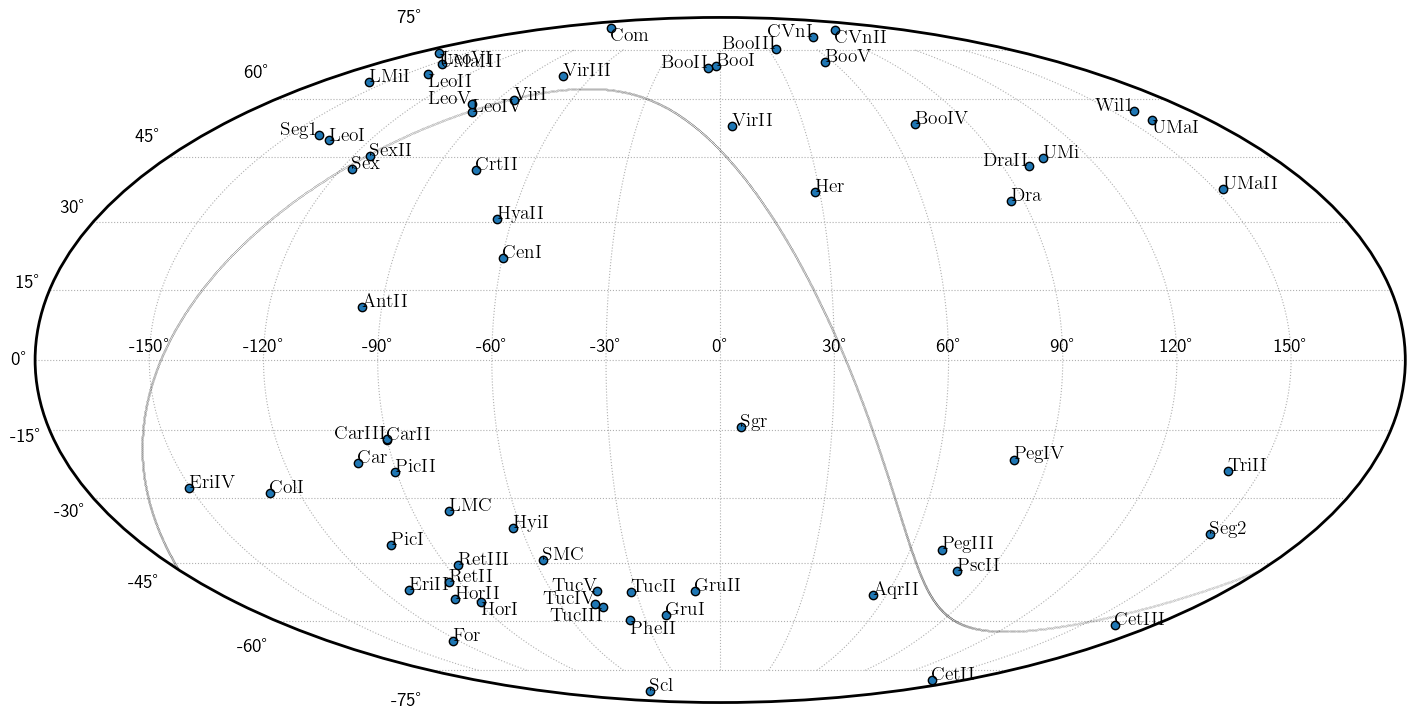

In [21]:
## older labeled version
## labeled by hand

fig = plt.figure(1,figsize=(16*.9,9*.9))

ax = fig.add_subplot(111, projection='mollweide')
gal_long = np.arange(-180., 180., .1)
c_gc = coord.SkyCoord(ra=gal_long*u.deg, dec=np.zeros(len(gal_long))*u.deg,  frame='icrs')
temp = c_gc.transform_to('galactic')
ax.plot(temp.galactic.l.wrap_at(180*u.deg).rad, temp.galactic.b.rad  , '.', c='k', ms=.1, rasterized=True,)
ax.plot(c_dsph_mw.galactic.l.wrap_at(180*u.deg).rad, c_dsph_mw.galactic.b.rad  , 'o', label=r'${\rm Dwarf~MW}$', mec='k')
for i, txt in enumerate(np.arange(len(c_dsph_mw))):
    horizontalalignment='left'
    verticalalignment='baseline'
    if dsph_mw['key'][i] in ['bootes_2', 'segue_1', 'carina_3', 'draco_2', 'leo_5', 'willman_1', 'tucana_4', 'tucana_3', 'tucana_5', 'bootes_3', 'canes_venatici_1']:
        horizontalalignment='right'
    if dsph_mw['key'][i] in ['tucana_3', 'phoenix_2', 'horologium_1', 'canes_venatici_2', 'ursa_major_1', 'leo_2', 'ursa_major_3', 'coma_berenices_1']:
        verticalalignment='top'
    plt.gca().annotate(r'${\rm '+ dsph_mw['abv'][i] + '}$', (c_dsph_mw.galactic.l.wrap_at(180*u.deg).rad[i], c_dsph_mw.galactic.b.rad[i]),horizontalalignment=horizontalalignment,verticalalignment=verticalalignment )

ax.grid(ls=':')
plt.tight_layout()

plt.show()